<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3:</span> Principal Component Analysis</h1>
<hr>

Welcome to <span style="color:royalblue">Module 3: Principal Component Analysis</span>!

Principal Component Analysis, or PCA, is a popular dimensionality reduction technique.

PCA seeks to create new features by finding linear combinations of your original ones. These new features, called **principal components**, are meant to maximize the **"explained variance,"** which we'll explain further in the module.

* In this module, we'll prepare individual item features for our clustering algorithms, except this time we'll use PCA instead of thresholding.
* PCA is especially effective when you have many correlated features.
* Important: PCA creates new features that replace the original ones.


<br><hr id="toc">

### In this module...

In this module, we'll cover:
1. [Toy example: oval blob](#oval-blob)
2. [Principal components](#components)
3. [Dimensionality reduction](#reduction)
4. [Item data PCA](#item-data)
5. [Explained variance](#explained-variance)

<br><hr>

### First, let's import libraries and load the item data.

First, import libraries that you'll need.

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print("Hell yeah!")

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn (added later)
from sklearn.decomposition import PCA

Hell yeah!


Next, let's import the full item data that we saved in the previous module (before applying thresholds).
* Remember, we saved it as <code style="color:crimson">'item_data.csv'</code>.
* This time, we'll also pass in the argument <code style="color:steelblue">index_col=0</code> to tell Pandas to treat the first column (CustomerID) as the index.

In [2]:
# Read item_data.csv
df = pd.read_csv('project_files/item_data.csv', index_col=0)

Just to confirm, this dataset should have 2574 features:

In [3]:
# Display item_data's shape
df.shape

(414, 2574)

<span id="oval-blob"></span>
# 1. Toy example: oval blob

PCA is an elegant technique that's very practical, but it can be a bit hard to try it on our larger dataset right away.

Instead, let's first use one last toy example to break down the intuition behind PCA.

<br>
**First, we'll create an "oval blob" synthetic dataset.**
* Instead of both input features and a target variable, we'll only have 2 input features.
* $x_1$ will be random samples from a normal distribution.
* $x_2$ will be random samples from a normal distribution **plus $x_1$**.

In [4]:
# Set random seed
np.random.seed(101)

# Create first feature: x1
x1 = np.random.normal(0, 1, 100)

# Create second feature: x2
x2 = x1 + np.random.normal(0, 1, 100)

**Let's stack them together to form <code style="color:steelblue">X</code>, our input feature matrix.**
* We'll skip putting them in a Pandas DataFrame.
* Instead, we'll just stack them together as two separate columns in a matrix.

In [5]:
# Stack together as columns
X = np.stack([x1, x2], axis=1)

# Print shape of X
X.shape

(100, 2)

**Create a scaled version of your feature matrix and name it <code style="color:steelblue">X_scaled</code>.**
* You'll want to use <code style="color:steelblue">StandardScaler</code>.
* **Tip:** To fit and apply a transformation in one line of code, you can use the <code style="color:steelblue">.fit_transform()</code> function.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [6]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform X
X_scaled = scaler.fit_transform(X)

# Display first 5 rows of X_scaled
X_scaled[:5]

array([[ 2.45737416,  2.76968241],
       [ 0.44665735, -0.38363275],
       [ 0.71733989, -0.37695455],
       [ 0.3264168 , -0.60579169],
       [ 0.46889068,  0.39146426]])

**Plot a scatterplot of the scaled $x_1$ against the scaled $x_2$.**
* Label your axes as <code style="color:crimson">x1 (scaled)</code> and <code style="color:crimson">x2 (scaled)</code>.
* **Tip:** Call <code style="color:steelblue">plt.axis('equal')</code> after your scatterplot to put your plot's axes on the same scale.
* We have a recommended plot below. See the Answer Key for how to create it.

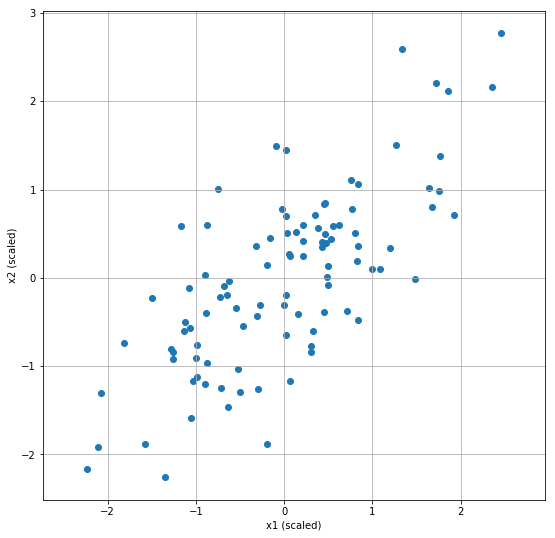

In [7]:
# Plot scatterplot of scaled x1 against scaled x2
plt.figure(figsize=(9,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.grid(True)

# Put plot axes on the same scale
plt.axis('equal')

# Label axes
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="components"></span>
# 2. Principal components

As it turns out, this type of distribution is very helpful for visualizing the mechanics behind PCA.

<br>
**First, add the following import line to your library imports above. Then, re-run that code cell.**

<pre style="color:steelblue">
from sklearn.decomposition import PCA
</pre>

<br>
**Next, we can initialize an instance of the PCA transformation.**
* This is just as we did for the StandardScaler transformation. 
* Then, we can fit the instance with just one line of code.

In [8]:
# Initialize instance of PCA transformation
pca = PCA()

# Fit the instance
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Let's display the principal components.**

In [9]:
# Display principal components
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

**Next, let's overlay the principal components on our oval blob.**
* We'll make the oval blob semi-transparent so we can see the principal components more easily.
* For clarity, we'll plot the first principal component in **black**, and we'll make it twice as long.
* We'll plot the first principal component in <strong style="color:red">red</strong>.

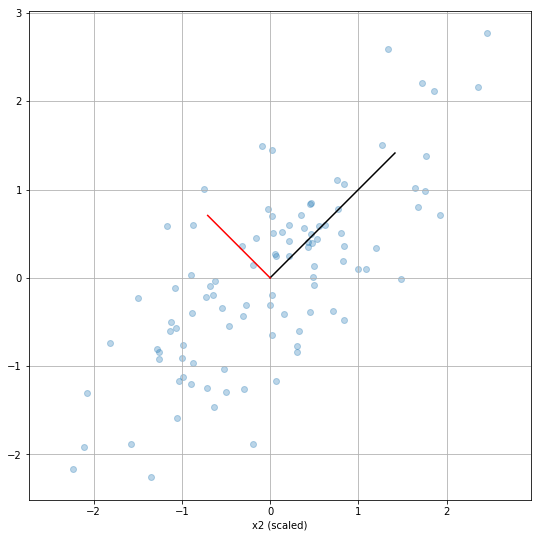

In [10]:
# Plot scaled dataset and make it partially transparent
plt.figure(figsize=(9,9))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.3)
plt.grid(True)

# Plot first principal component in black
plt.plot([0, 2 * pca.components_[0, 0]], [0, 2 * pca.components_[0, 1]], 'k')

# Plot second principal component in red
plt.plot([0, pca.components_[1, 0]], [0, pca.components_[1, 1]], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.xlabel('x2 (scaled)')

# Clear text residue
plt.show()

**Finally, we can transform our original features using the fitted PCA instance.**
* Remember, PCA generates new features that **replace** the original ones.
* We'll name these new features <code style="color:crimson">PC</code> (short for "principal component") to indicate that they are generated from PCA.

In [11]:
# Generate new features
PC = pca.transform(X_scaled)

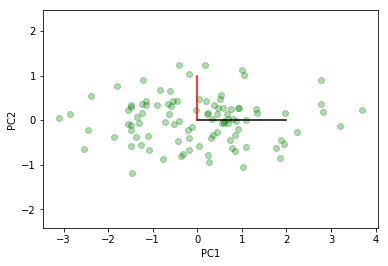

In [14]:
# Plot transformed dataset
plt.scatter(PC[:,0], PC[:,1], alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Plot second principal component in red
plt.plot([0, 0], [1, 0], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="reduction"></span>
# 3. Dimensionality reduction

Here's where dimensionality reduction comes into play. You can just keep some number of the "best" components, a.k.a. the ones that explain the most variance.

<br>
**First, display the "explained variance" ratio of each component.**

In [23]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([0.86915841, 0.13084159])

**To keep only 1 component, we can simply initialize and fit another PCA transformation.**
* This time, we'll simply pass the argument <code style="color:steelblue">n_components=1</code>.

In [24]:
# Initialize and fit a PCA transformation, only keeping 1 component
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
# Display principal components
pca.components_

array([[0.70710678, 0.70710678]])

In [26]:
# Generate new features
PC = pca.transform(X_scaled)
PC.shape

(100, 1)

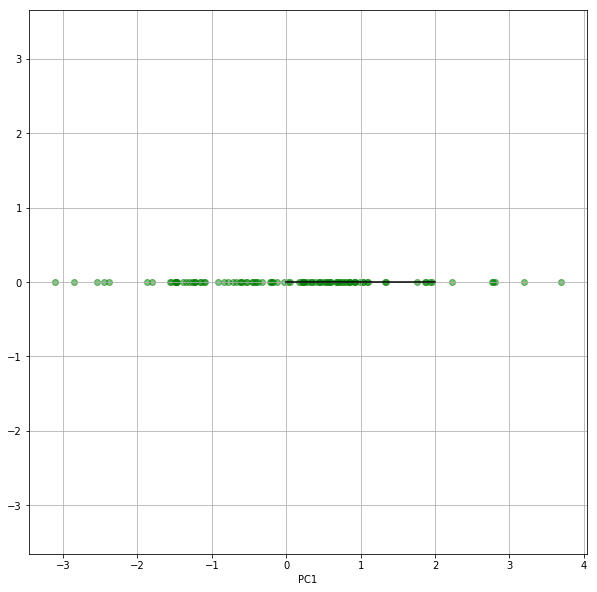

In [38]:
# Plot transformed dataset
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.scatter(PC[:, 0], len(PC)*[0], alpha=0.5, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')

# Clear text residue
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="item-data"></span>
# 4. Item data PCA

Now let's get back to our project.

<br>
**First, scale <code style="color:crimson">item_data</code>, which you imported at the beginning of this module.**
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [41]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(df)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

**Next, initialize and fit an instance of the PCA transformation.**
* Keep all of the components for now (just don't pass in any argument).

In [44]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Finally, generate new "principal component features" from <code style="color:crimson">item_data_scaled</code>.**
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [45]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00, -4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  3.41393580e-15],
       [-4.21983747e+00,  1.22621722e+00, -1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04, -3.15372728e-15],
       [-1.26084676e+00,  2.38766371e+00, -7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04, -6.81746326e-16],
       [-4.92931983e+00, -7.14858724e-01, -1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05, -1.44155521e-15],
       [-2.05311348e+00,  2.11095022e+00,  1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04,  4.44089210e-15]])

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="explained-variance"></span>
# 5. Explained variance

Earlier, we already saw how to display the **explained variance ratio** for each of the principal components.

<br>
**It's very helpful to calculate and plot the <u>cumulative</u> explained variance.**
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, we'll use <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance.
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

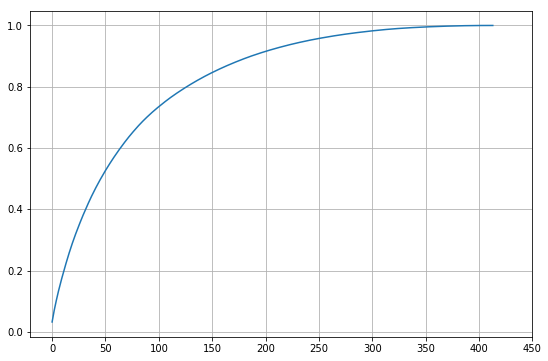

In [54]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(9, 6))
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.xticks(np.arange(0, 500, 50))
plt.grid(True)
plt.show()

In [61]:
# How much variance we'd capture with the first 125 components
# you can look at the plot, no need to find indices - unless you have no plots
cumulative_explained_variance[124] 

0.7955069032205403

**Initialize and fit another PCA transformation.**
* This time, only keep 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 125 features.

In [62]:
# Initialize PCA transformation, only keeping 125 components
# only take first 125 components, because they have the bigger variance 
# (check the AOC between first 80% records and those remaining) :)
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

**Next, for convenience, let's put <code style="color:crimson">PC_items</code> into a new dataframe.**
* We'll also name the columns and update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.

In [67]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = df.index

# Display first 5 rows
items_pca.head(15)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,...,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,...,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,...,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,...,-1.869817,-0.460085,-1.192275,-0.596812,-0.808693,0.373854,-0.282510,-0.819361,-1.010051,0.363232
12352,-2.053129,2.110788,0.184844,0.128379,0.087133,-1.943497,2.383475,0.898283,-0.672848,0.081181,...,1.695937,8.096258,10.325739,-8.947321,-3.582689,-2.078227,3.346192,5.183793,0.928319,-1.933235
12353,-6.373811,-0.174423,-0.621240,-0.352693,0.218643,0.783500,-0.251304,-0.151729,0.697116,-0.186360,...,0.147658,-0.035935,-0.220121,-0.089187,-0.158037,-0.005960,0.035205,-0.134681,-0.127925,0.093870
12354,-2.214764,-1.160907,-0.338153,-0.919857,0.051248,0.837342,-1.113331,-0.998130,-0.568347,0.714147,...,-0.334569,-0.472099,1.034624,-0.137277,0.964419,-0.298490,-0.193470,0.158224,0.882766,0.095065
12355,-5.801691,-0.031380,-0.499831,0.597616,-0.159788,0.871256,-0.834318,0.621599,1.034642,-0.429645,...,-0.293407,-0.301243,-1.822208,-0.382458,0.450567,-0.027942,-0.776005,0.466221,1.143893,-0.186761
12356,-3.172041,1.135724,1.142883,-0.334186,-1.516868,1.698924,-1.183612,0.865601,0.184317,0.417764,...,-0.980440,4.181372,0.683882,1.139770,-0.077212,-1.981162,-0.144611,-2.709063,-0.894229,1.640387


**Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.**
* In <span style="color:royalblue">Module 4</span>, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* Do **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [69]:
# Save pca_item_data.csv
items_pca.to_csv('project_files/pca_item_data.csv')

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>
## Next Steps

Congratulations for making it through Project 4's Principal Component Analysis!

As a reminder, here are a few things you did in this module:
* You saw how PCA works on an oval blob.
* You contrasted plots of the original features against plots of the principal component features.
* You learned how to intepret cumulative explained variance.
* And you reduced the dimensionality of the item dataset using PCA.

In the next module, <span style="color:royalblue">Module 4: Cluster Analysis</span>, we'll see how different feature sets lead to different clusters. We'll apply K-Means clustering to the analytical base table, the threshold item features, and the PCA item features.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>